In [1]:
from bin import load_bgi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from bin import load_bgi as ld
guide_data = ld.load_bin("/home/wpy/stereoseq/20240802-Tumor/filter_gem/filter_assign_binary.gem",
                         bin_size=100,
                         library_id="spatial")

In [3]:
import scanpy as sc
fdata = sc.read_h5ad("/home/wpy/stereoseq/20240802-Tumor/RNA/B03502E5.clustered.h5")


In [6]:
fdata.obs['coord_x'] = fdata.obsm['spatial'][:, 0] // 100 * 100
fdata.obs['coord_y'] = fdata.obsm['spatial'][:, 1] // 100 * 100

guide_data.obs['coord_x'] = guide_data.obsm['spatial'][:, 0] // 100 * 100
guide_data.obs['coord_y'] = guide_data.obsm['spatial'][:, 1] // 100 * 100
fdata.obs_names = [str(x) + '_' + str(y) for x, y in zip(fdata.obs['coord_x'], fdata.obs['coord_y'])]
guide_data.obs_names = [str(x) + '_' + str(y) for x, y in zip(guide_data.obs['coord_x'], guide_data.obs['coord_y'])]

common_bins = np.intersect1d(fdata.obs_names, guide_data.obs_names)
fdata = fdata[common_bins].copy()
guide_data = guide_data[common_bins].copy()

In [8]:
guide_data.write_h5ad("./RNA/B03502E5.filtered.guide.fixed.bin100.h5")

In [ ]:
offset_x, offset_y = -1, 0

In [ ]:
df = pd.read_csv("./RNA/B03502E5.gem", sep='\t', comment='#')

In [5]:
offset_x += 1057
offset_y += 766

In [7]:
df.x = df.x + offset_x
df.y = df.y + offset_y

In [9]:
g_df = df

In [14]:
r_df = pd.read_csv("/home/zhanghr/seq/SPAC-seq/stereo/tumor-1520/sgRNA/B03502E5.tissue.gem.gz", sep='\t', comment='#')

In [20]:
bin20_df = r_df[["x", "y"]] // 20 * 20

In [26]:
g_df["bin20_x"] = g_df["x"] // 20 * 20
g_df["bin20_y"] = g_df["y"] // 20 * 20

In [32]:
bin20_df.columns=["bin20_x", "bin20_y"]

In [38]:
bin20_df.set_index(["bin20_x", "bin20_y"], inplace=True)

In [39]:
g_df.set_index(["bin20_x", "bin20_y"], inplace=True)

In [43]:
bin20_unique = bin20_df.index.unique()

In [47]:
np.array(bin20_unique)

array([(9440, 16300), (13520, 13700), (13800, 7580), ..., (11980, 3840),
       (12000, 3840), (14880, 6000)], dtype=object)

In [54]:
g_df.index[0] in [(5740, 14660), (110, 1)]

True

In [67]:
inter_set = set(g_df.index.unique()).intersection(set(bin20_unique))

In [84]:
cut_df = g_df.loc[list(inter_set)].reset_index()

In [89]:
clean_df = cut_df.iloc[:, -5:]

In [92]:
clean_df

,geneID,x,y,MIDCount,ExonCount
0,sgDsc2_2_gene,9554,6560,1,1
1,sgStmn1_1_gene,7975,11250,1,1
2,sgTnfrsf11a_2_gene,5621,13997,1,1
3,sgAoc1_1_gene,6155,9328,1,1
4,sgIl15ra_1_gene,6140,9327,1,1
...,...,...,...,...,...
163881,sgCant1_2_gene,11401,11078,1,1
163882,sgAsph_2_gene,5508,8960,1,1
163883,sgLtbr_1_gene,5500,8973,1,1
163884,sgCdcp1_2_gene,5508,8960,1,1


In [93]:
r_df

,geneID,x,y,MIDCount,ExonCount
0,AC168977.1,9450,16304,1,0
1,AC168977.1,13533,13706,1,0
2,AC168977.1,13818,7595,1,1
3,AC168977.1,12328,17883,2,2
4,Spry3,5288,17584,1,1
...,...,...,...,...,...
72886835,Gm42418,11059,13141,1,1
72886836,Gm42418,7260,15914,2,2
72886837,Gm42418,9710,5290,4,4
72886838,Gm42418,10544,6874,4,4


In [98]:
output_df = pd.concat([r_df, clean_df], axis=0)

In [99]:
output_df

,geneID,x,y,MIDCount,ExonCount
0,AC168977.1,9450,16304,1,0
1,AC168977.1,13533,13706,1,0
2,AC168977.1,13818,7595,1,1
3,AC168977.1,12328,17883,2,2
4,Spry3,5288,17584,1,1
...,...,...,...,...,...
163881,sgCant1_2_gene,11401,11078,1,1
163882,sgAsph_2_gene,5508,8960,1,1
163883,sgLtbr_1_gene,5500,8973,1,1
163884,sgCdcp1_2_gene,5508,8960,1,1


In [100]:
output_df.to_csv('./RNA/B03502E5.cut.combined.offset.tissue.gem', sep='\t', index=None, header=True)

In [101]:
cdata_bin20 = load_bgi.load_bin('./RNA/B03502E5.cut.combined.offset.tissue.gem', library_id='RNA', bin_size=20)

In [102]:
cdata_bin100 = load_bgi.load_bin('./RNA/B03502E5.cut.combined.offset.tissue.gem', library_id='RNA', bin_size=100)

In [103]:
cdata_bin20.write_h5ad('./RNA/B03502E5.combined.bin20.h5')
cdata_bin100.write_h5ad('./RNA/B03502E5.combined.bin100.h5')

In [2]:
import scanpy as sc
cdata_bin20 = sc.read_h5ad('./RNA/B03502E5.combined.bin20.h5')

In [3]:
gdata = cdata_bin20[:, cdata_bin20.var_names.str.startswith('sg')].copy()

In [4]:
import scanpy as sc
import squidpy as sq

In [5]:
fdata = cdata_bin20[:, ~cdata_bin20.var_names.str.startswith('sg')].copy()

In [7]:
sc.pp.calculate_qc_metrics(fdata, log1p=False, inplace=True)

In [6]:
from bin import utils
import matplotlib.pyplot as plt

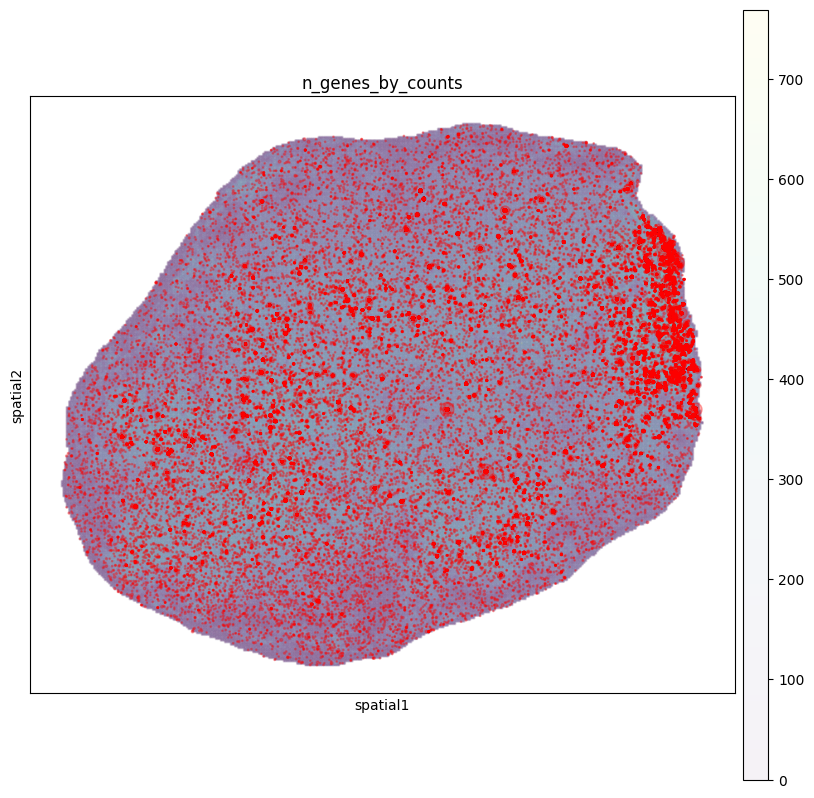

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sq.pl.spatial_scatter(fdata, color='n_genes_by_counts', shape=None, size=2, library_id='RNA', ax=ax, alpha=0.05)
for guide in gdata.var_names:
    utils.plot_dot(gdata, guide, ax=ax, square=False, color='red', alpha=0.3)
plt.legend().set_visible(False)
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


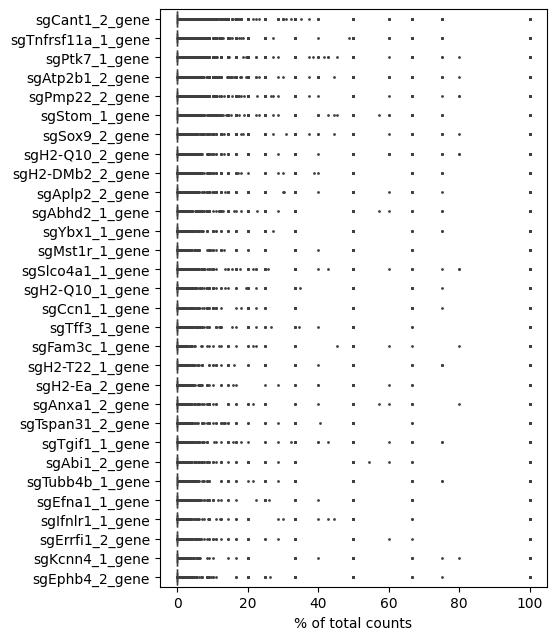

In [7]:
sc.pl.highest_expr_genes(gdata)

In [8]:
c_gdata = utils.combine_guide_replicates(gdata)

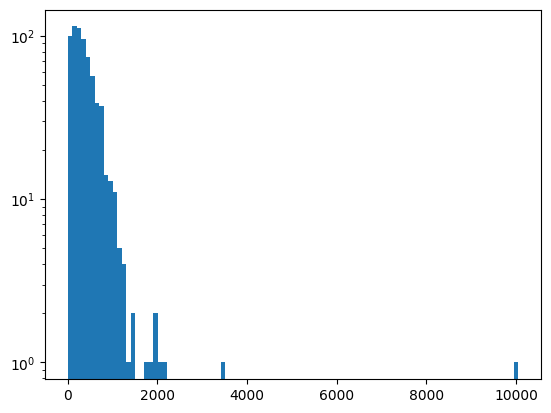

In [18]:
plt.hist(c_gdata.X.sum(axis=0), bins=100)
plt.gca().set_yscale('log')

In [10]:
import numpy as np

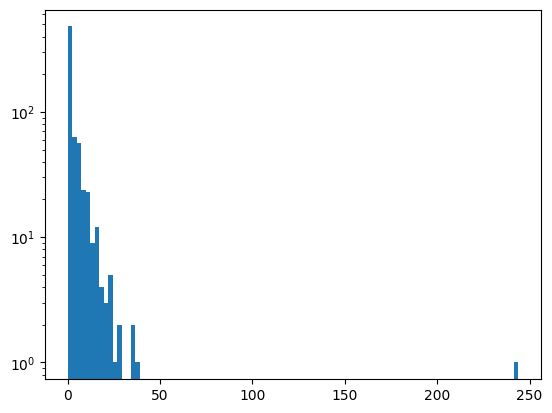

In [37]:
plt.hist((c_gdata.X > np.quantile(c_gdata.X, 0.99999)).sum(axis=0), bins=100)
plt.gca().set_yscale('log')

In [41]:
c_gdata.var_names[(c_gdata.X > np.quantile(c_gdata.X, 0.99999)).sum(axis=0) > 200]

Index(['sgNon-targeting'], dtype='object')

In [20]:
c_gdata.var_names[c_gdata.X.sum(axis=0) > 1800]

Index(['sgAtp2b1', 'sgCant1', 'sgH2-Q10', 'sgNon-targeting', 'sgPmp22',
       'sgPtk7', 'sgTnfrsf11a'],
      dtype='object')

/tmp/ipykernel_49830/2560262843.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')


[]

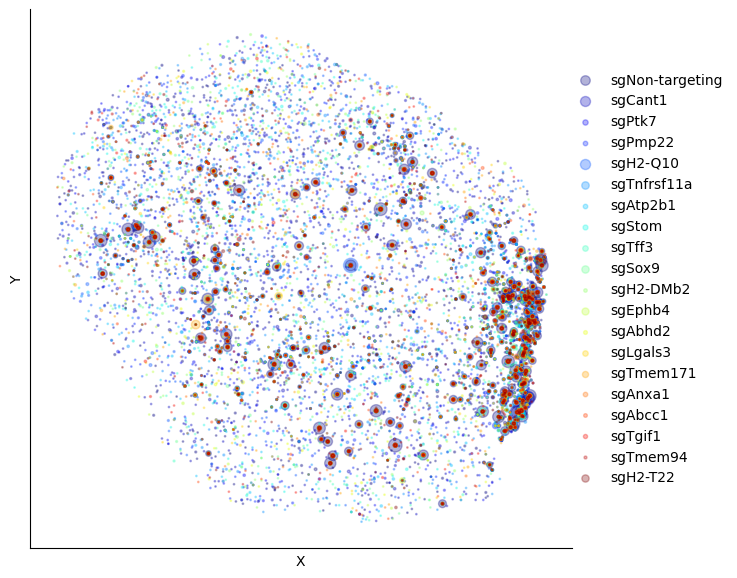

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
import pandas as pd
cdf = pd.DataFrame(c_gdata.X.sum(axis=0), index=c_gdata.var_names, columns=['n_total'])
import matplotlib.cm as cm
cmap = cm.get_cmap('jet')

num_colors = 20
colors = cmap(np.linspace(0, 1, num_colors))

cdf = cdf.sort_values(by='n_total', ascending=False).iloc[:20]

for i, idx in enumerate(cdf.index):
    utils.plot_dot(c_gdata, idx, ax=ax, square=False, color=colors[i], alpha=0.3)
plt.legend(loc='right', frameon=False, bbox_to_anchor=[1.3, 0.5])
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks([])
ax.set_yticks([])
# plt.rcParams['pdf.fonttype']=42
# plt.savefig("../20240502-SPACseq/plots/tumor_major_clone_map.pdf", format="pdf", bbox_inches='tight')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


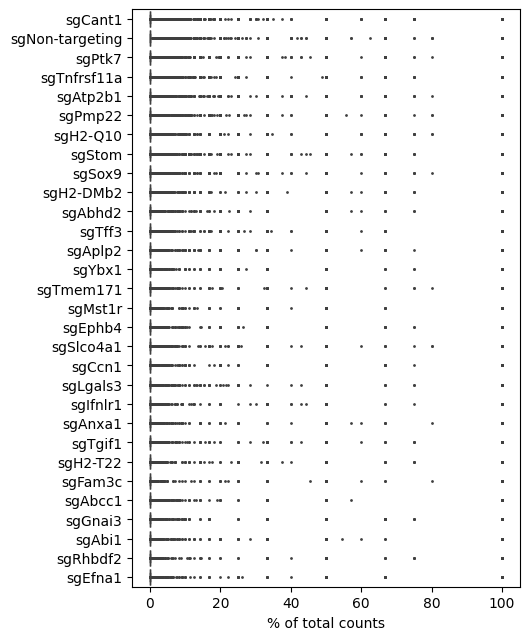

In [54]:
sc.pl.highest_expr_genes(c_gdata)

In [15]:
from scipy.stats import entropy
rel_matrix = c_gdata.X.T / c_gdata.X.sum(axis=1)
s_index = np.apply_along_axis(lambda x: entropy(x).mean(), 0, rel_matrix)

/tmp/ipykernel_46815/2695271674.py:2: RuntimeWarning: invalid value encountered in divide
  rel_matrix = c_gdata.X.T / c_gdata.X.sum(axis=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


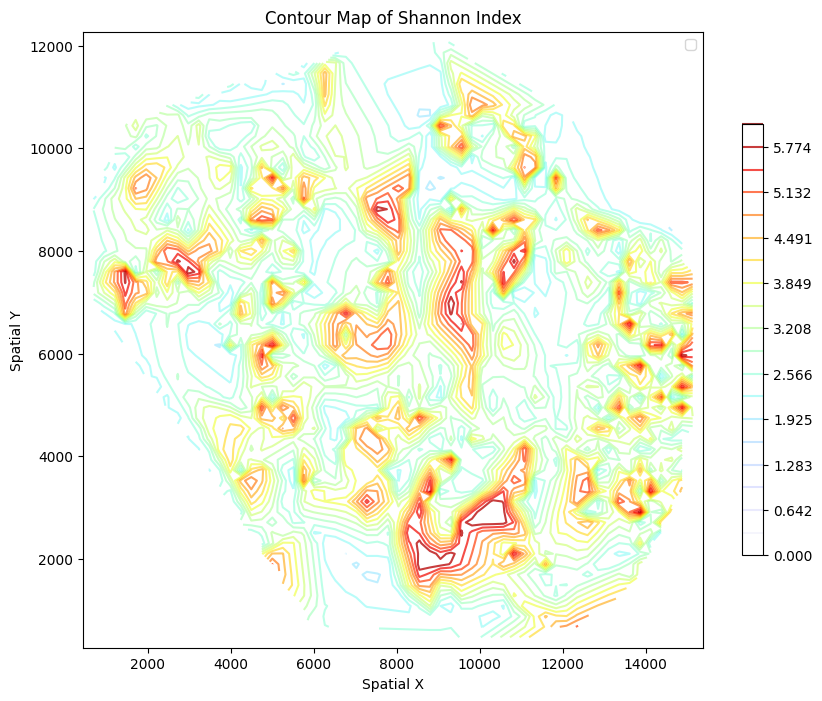

In [16]:
# Assuming plot_data is your AnnData object and apo_bin is the gene expression data
# x_region = (0, 12000)
# y_region = (0, 12000)

from scipy.interpolate import griddata
x_region = (0, 30000)
y_region = (0, 30000)

apo_bin = s_index
hypo_coord = c_gdata.obsm['spatial']

# Create DataFrame with spatial coordinates and gene expression values
coord_df = pd.DataFrame({
    'x_coord': hypo_coord[:, 0],
    'y_coord': hypo_coord[:, 1],
    'value': apo_bin
})

# Remove points with no data (NaN)
coord_df = coord_df.dropna()

threshold = 1.8
coord_df = coord_df[coord_df['value'] > threshold]

# Pivot table to create a grid
coord_df_piv = pd.pivot_table(coord_df, values="value", index="y_coord", columns="x_coord", aggfunc=np.mean)
y = coord_df_piv.index.values
x = coord_df_piv.columns.values

# Create a colormap
color_map = plt.get_cmap("jet")
new_cmap = mcolors.ListedColormap(color_map(np.linspace(0, 1, 100)))
new_cmap.colors[:, -1] = np.linspace(0, 0.8, new_cmap.N)

# Interpolation
xi = np.linspace(x.min(), x.max(), 60)
yi = np.linspace(y.min(), y.max(), 60)
xi, yi = np.meshgrid(xi, yi)

# Flatten the x and y coordinates for griddata
points = np.array([coord_df['x_coord'].values, coord_df['y_coord'].values]).T

values = coord_df['value'].values
vmax = np.quantile(values, 0.99)
values = [vmax if v > vmax else v for v in values]
zi = griddata(points, values, (xi, yi), method='linear')

# Plot contour map
fig, ax = plt.subplots(figsize=(10, 8))
levels = np.linspace(np.min(pd.DataFrame(zi).fillna(0)), np.max(pd.DataFrame(zi).fillna(0)), 20)
cs = ax.contour(xi, yi, zi, levels=levels, cmap=new_cmap)
plt.colorbar(cs, ax=ax, shrink=0.7)

# colormap = cm.get_cmap("jet")
# colors = colormap(np.linspace(0, 1, len(plot_data.var_names)))
# for idx, guide in enumerate(plot_data.var_names):
#     utils.plot_dot(plot_data, guide, ax=ax, square=True, color=colors[idx])

plt.xlabel('Spatial X')
plt.ylabel('Spatial Y')
plt.title('Contour Map of Shannon Index')
# plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [19]:
c_gdata.obs['shannon'] = s_index

In [20]:
c_gdata.obs['shannon'].fillna(0, inplace=True)

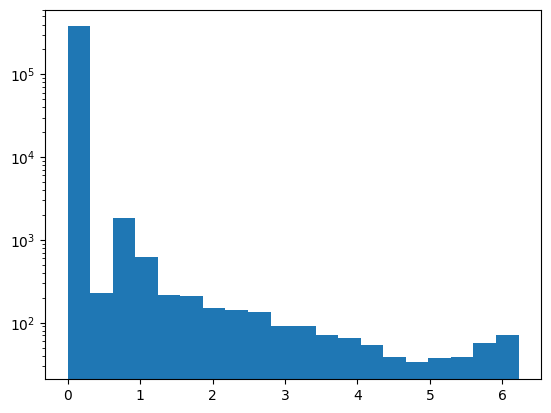

In [27]:
plt.hist(c_gdata.obs['shannon'], bins=20)
plt.gca().set_yscale('log')

In [28]:
high_s_bins = c_gdata[c_gdata.obs['shannon'] > 5]
low_s_bins = c_gdata[(c_gdata.obs['shannon'] > 0) & (c_gdata.obs['shannon'] < 2)]

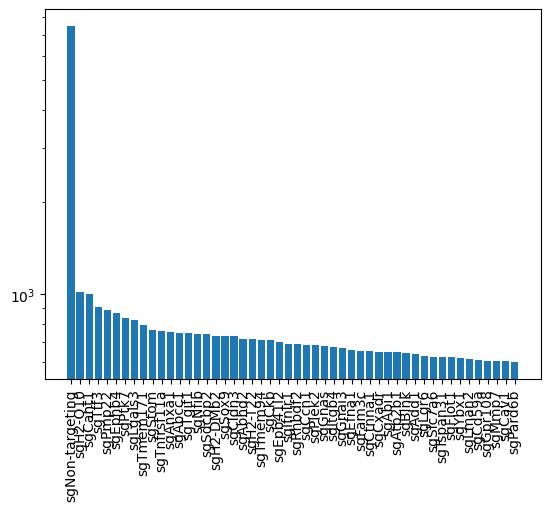

In [49]:
c_df = pd.DataFrame(high_s_bins.X, columns=high_s_bins.var_names).sum(axis=0).sort_values(ascending=False)[:50]
plt.bar(c_df.index, c_df)
plt.xticks(rotation=90)
plt.gca().set_yscale('log')
plt.show()

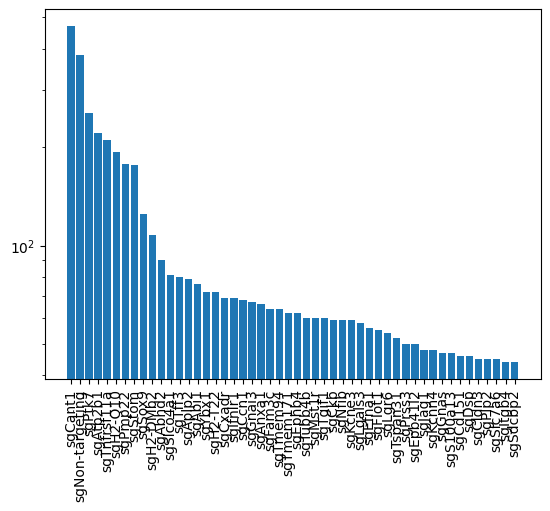

In [50]:
c_df = pd.DataFrame(low_s_bins.X, columns=high_s_bins.var_names).sum(axis=0).sort_values(ascending=False)[:50]
plt.bar(c_df.index, c_df)
plt.xticks(rotation=90)
plt.gca().set_yscale('log')
plt.show()